# 课堂实践：`OLS`

### 1. 导入必要的库

In [1]:
import wooldridge as woo  # 用于加载数据集
import numpy as np  # 用于数学计算
import matplotlib.pyplot as plt  # 用于绘制图表

### 2. 加载数据集并查看数据前几行

In [2]:
ceosal1 = woo.dataWoo('ceosal1')  # 从 wooldridge 库加载 "ceosal1" 数据集
ceosal1.head(5)   # 打印数据集的前五行，了解数据的概况

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894


### 3. 绘制散点图：展示“roe”和“salary”之间的关系

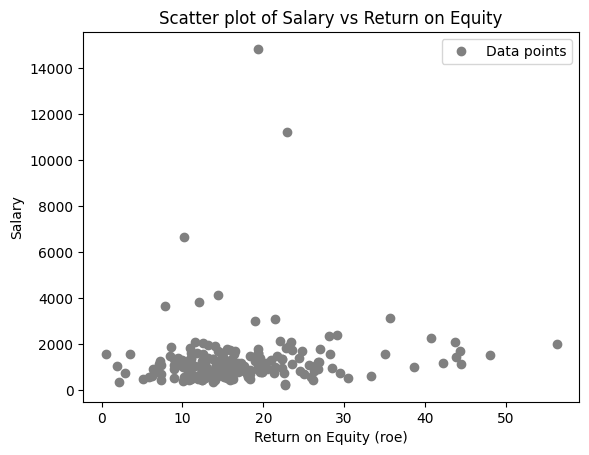

In [3]:
plt.figure(figsize=(6.4, 4.8))  # 设置图形的大小
plt.plot(ceosal1['roe'], ceosal1['salary'], color='grey', marker='o', linestyle='', label='Data points') # 散点图
plt.xlabel('Return on Equity (roe)', fontsize=10)  # x轴标签：净资产收益率 (roe)
plt.ylabel('Salary', fontsize=10)  # y轴标签：薪水 (Salary)
plt.title('Scatter plot of Salary vs Return on Equity', fontsize=12)  # 标题：薪水与净资产收益率的散点图
# plt.grid()  # 显示网格
plt.legend()  # 显示图例
plt.show()

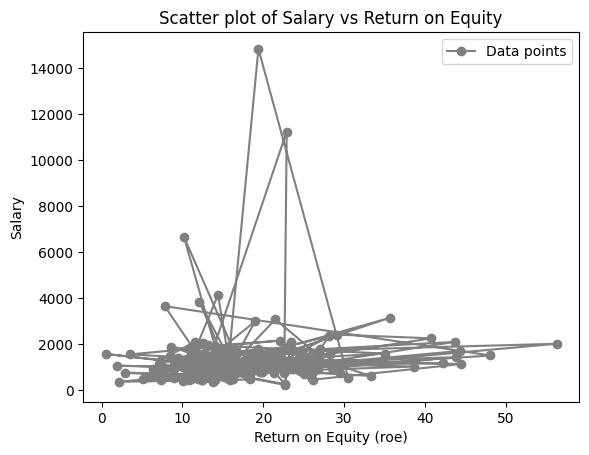

In [4]:
plt.figure(figsize=(6.4, 4.8))  # 设置图形的大小
plt.plot(ceosal1['roe'], ceosal1['salary'], color='grey', marker='o', linestyle='-', label='Data points') # 折线图
plt.xlabel('Return on Equity (roe)', fontsize=10)  # x轴标签：净资产收益率 (roe)
plt.ylabel('Salary', fontsize=10)  # y轴标签：薪水 (Salary)
plt.title('Scatter plot of Salary vs Return on Equity', fontsize=12)  # 标题：薪水与净资产收益率的散点图
# plt.grid()  # 显示网格
plt.legend()  # 显示图例
plt.show()

### 4. 基于 协方差与方差 计算回归系数 $\beta_0$ 和 $\beta_1$
- 模型：$salary = \beta_0+\beta_1 roe + \epsilon$
    - $\hat{\beta_1} = \frac{Cov(x,y)}{Var(x)}$
    - $\hat{\beta_0} = \bar{y}-\hat{\beta_1}\bar{x}$
- 结果：$\hat{salary} = 963.1913 + 18.5012 \cdot roe$

In [5]:
x = ceosal1['roe']  # 提取 'roe' 变量
y = ceosal1['salary']  # 提取 'salary' 变量

cov_xy = np.cov(x, y)[0, 1]  # 获取协方差矩阵中的协方差
var_x = np.var(x, ddof=1)  # 计算 x 的样本方差（ddof=1表示样本方差）
b1 = cov_xy / var_x  # 计算回归系数 β1

x_bar = np.mean(x)  # 计算 'roe' 的均值
y_bar = np.mean(y)  # 计算 'salary' 的均值
b0 = y_bar - b1 * x_bar  # 根据公式计算 β0

print(f'cons: {b0:.4f}')  # 输出 b0
print(f'roe: {b1:.4f}')  # 输出 b1


cons: 963.1913
roe: 18.5012


### 5. 绘制拟合结果

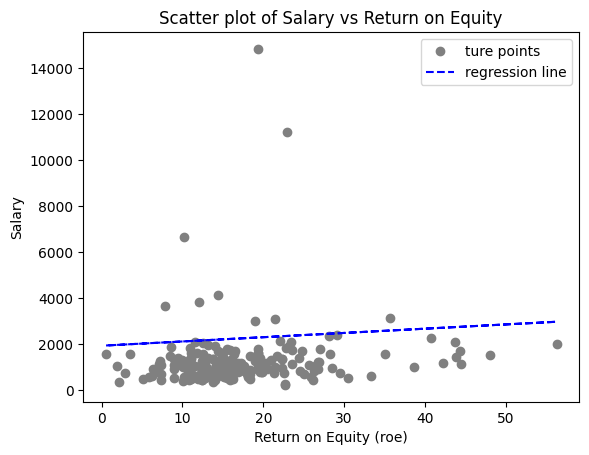

In [6]:
y_hat = b0 + b0 + b1 * ceosal1['roe'] # 计算拟合值

plt.figure(figsize=(6.4, 4.8))  # 设置图形的大小
plt.plot(ceosal1['roe'], ceosal1['salary'], color='grey', marker='o', linestyle='', label='ture points') # 散点图
plt.plot(ceosal1['roe'], y_hat , color='blue', marker='', linestyle='--', label='regression line')  # 绘制回归线
plt.xlabel('Return on Equity (roe)', fontsize=10)  # x轴标签：净资产收益率 (roe)
plt.ylabel('Salary', fontsize=10)  # y轴标签：薪水 (Salary)
plt.title('Scatter plot of Salary vs Return on Equity', fontsize=12)  # 标题：薪水与净资产收益率的散点图
# plt.grid(True)  # 显示网格
plt.legend()  # 显示图例
plt.show()  # 展示图表

### 课堂练习1： 基于 矩阵 计算回归系数 $\beta_0$ 和 $\beta_1$
- 模型：$salary = \beta_0+\beta_1 roe + \epsilon$
    - $\hat{\beta} = (X^TX)^{-1}X^Ty$
    - 其中：
        - $y$ 是 $n \times 1$ 的因变量（目标变量）向量
        - $X$ 是 $n \times p$ 的自变量（特征变量）矩阵（包含一列常数项 1，用于计算截距项）
        - $\beta$ 是 $p \times 1$ 的回归系数向量
        - $\epsilon$ 是误差项
- 结果：$\hat{salary} = 963.1913 + 18.5012 \cdot roe$

In [7]:
x = ceosal1['roe']  # 提取自变量 'roe'
y = ceosal1['salary']  # 提取因变量 'salary'

cons = np.ones(x.shape)  # 创建一个与 x 同大小的常数项向量，用于添加截距项
X = np.c_[cons, x]  # 将常数项和 'roe' 组合成一个矩阵 X，其中第一列是常数项，第二列是 'roe'

beta = np.linalg.inv(X.T @ X) @ X.T @ y  # 计算回归系数

print(f'cons: {beta[0]:.4f}')  # 截距项
print(f'roe: {beta[1]:.4f}')  # 'roe' 的回归系数

cons: 963.1913
roe: 18.5012


### 课堂练习2： 绘制拟合结果

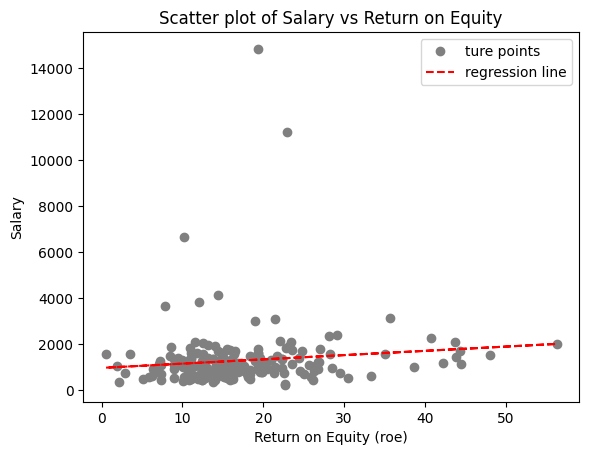

In [8]:
y_hat_2 = X @ beta  # 使用计算得到的回归系数预测 y 的值

plt.figure(figsize=(6.4, 4.8))  # 设置图形的大小
plt.plot(ceosal1['roe'], ceosal1['salary'], color='grey', marker='o', linestyle='', label='ture points') # 散点图
plt.plot(ceosal1['roe'], y_hat_2 , color='red', marker='', linestyle='--', label='regression line')  # 绘制回归线
plt.xlabel('Return on Equity (roe)', fontsize=10)  # x轴标签：净资产收益率 (roe)
plt.ylabel('Salary', fontsize=10)  # y轴标签：薪水 (Salary)
plt.title('Scatter plot of Salary vs Return on Equity', fontsize=12)  # 标题：薪水与净资产收益率的散点图
# plt.grid(True)  # 显示网格
plt.legend()  # 显示图例
plt.show()  # 展示图表

### 课堂练习3（拓展）： 计算回归系数 $\beta_0$ 和 $\beta_1$（调用现成的包：`import statsmodels.api as sm`）
- 模型：$salary = \beta_0+\beta_1 roe + \epsilon$
    - 模型构建 `model = sm.OLS(y, X)`：使用了 statsmodels 库的 OLS 函数来构建回归模型
    - 该函数接受两个主要参数：
        - $y$ 因变量，是一个包含观测值的向量（在上述模型中，表示各个观测单位的薪水）
        - $X$ 自变量矩阵，它包含了所有用于预测的特征变量（上述模型中，包括常数项（截距）和 roe 变量）
    - 模型被构建后，通过 `model.fit()` 方法对数据进行拟合，得到回归系数，并计算其他统计量（如 $t$ 值、$p$ 值、标准误差等）
    - 异方差稳健标准误差：在回归过程中，可能存在异方差（不同观测值的误差项方差不同）。
        - 使用 `cov_type='HC0'` 来指定计算 White异方差稳健标准误差，这能够调整标准误差的估计，使得回归系数的统计推断更加可靠
- 结果：$\hat{salary} = 963.1913 + 18.5012 \cdot roe$

In [9]:
import statsmodels.api as sm

x = ceosal1['roe']  # 提取自变量 'roe'
y = ceosal1['salary']  # 提取因变量 'salary'
X = sm.add_constant(x)  # 使用 statsmodels 的函数自动添加常数项，返回一个包含常数项的设计矩阵

model = sm.OLS(y, X) # 创建 OLS 模型
robust_results = model.fit(cov_type='HC0')  # 拟合模型并使用 White 异方差稳健标准误差
print(robust_results.summary())  # 输出模型的拟合结果，包含稳健标准误差和其他统计信息

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.410
Date:                Fri, 28 Feb 2025   Prob (F-statistic):            0.00704
Time:                        12:23:15   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    120.525      7.992      0.0